<a href="https://colab.research.google.com/github/ccepelak/imdb-ratings/blob/main/Christine_Cepelak_Audible_Data_Science_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Movie Ratings Based on IMDb Data**

Developing a linear regression model which  predicts a movie’s average rating based on historical IMDb Data.

## 1. Loading & Exploring the Data

In [ ]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, Ridge, RidgeCV


In [ ]:
# Python program to convert .tsv file to .csv file
tsv_file1='title.basics.tsv'
tsv_file2='title.ratings.tsv'

# reading tsv files
csv_table1=pd.read_table(tsv_file1,sep='\t')
csv_table2=pd.read_table(tsv_file2,sep='\t')

# converting to csv
csv_table1.to_csv('title_basics.csv',index=False)
csv_table2.to_csv('title_ratings.csv',index=False)


In [ ]:
#loading new csv files
titles = pd.read_csv("title_basics.csv")

ratings = pd.read_csv("title_ratings.csv")

In [ ]:
#Exploring the shape of the new dataframe
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1892.0
1,tt0000002,5.9,252.0
2,tt0000003,6.5,1686.0
3,tt0000004,5.7,165.0
4,tt0000005,6.2,2501.0


In [ ]:
#Exploring the shape of the new dataframe

print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241068 entries, 0 to 241067
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   tconst         241068 non-null  object 
 1   averageRating  241068 non-null  float64
 2   numVotes       241067 non-null  float64
dtypes: float64(2), object(1)
memory usage: 5.5+ MB
None


In [ ]:
#Exploring the shape of the new dataframe

print(ratings.shape)

(241068, 3)


In [ ]:
#Exploring the new dataframe

print(ratings.describe())

       averageRating      numVotes
count  241068.000000  2.410670e+05
mean        6.288989  2.216019e+03
std         1.278884  2.748645e+04
min         1.000000  5.000000e+00
25%         5.500000  1.700000e+01
50%         6.400000  4.900000e+01
75%         7.200000  1.930000e+02
max        10.000000  2.602914e+06


In [ ]:
# Filter for rows where numVotes is greater than 1000 
new_ratings = ratings[(ratings["numVotes"] > 1000)]
print(new_ratings.head())

      tconst  averageRating  numVotes
0  tt0000001            5.7    1892.0
2  tt0000003            6.5    1686.0
4  tt0000005            6.2    2501.0
7  tt0000008            5.4    2029.0
9  tt0000010            6.9    6835.0


In [ ]:
# Find the mean of the ratings given to each title
average_rating_df = new_ratings[["tconst", "averageRating"]].groupby('tconst').mean()

# Order the entries by highest average rating to lowest
sorted_average_ratings = average_rating_df.sort_values(by="averageRating", ascending=False)

# Look at top movies
print(sorted_average_ratings.head())

           averageRating
tconst                  
tt0184666            9.6
tt0180825            9.6
tt0183066            9.5
tt0356070            9.5
tt0365498            9.5


In [ ]:
#Exploring the shape of the new dataframe
titles.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0.0,1894.0,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892.0,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0.0,1892.0,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0.0,1892.0,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893.0,\N,1,"Comedy,Short"


In [ ]:
#create a dataframe with only necessary data frmr titles.csv
titlesdf = pd.DataFrame(titles)

# Using DataFrame.loc[] create new DataFrame by specific column.
new_titles=titlesdf.loc[:, titlesdf.columns.drop(['titleType', 'endYear'])]
print(new_titles)

          tconst            primaryTitle            originalTitle  isAdult  \
0      tt0000001              Carmencita               Carmencita      0.0   
1      tt0000002  Le clown et ses chiens   Le clown et ses chiens      0.0   
2      tt0000003          Pauvre Pierrot           Pauvre Pierrot      0.0   
3      tt0000004             Un bon bock              Un bon bock      0.0   
4      tt0000005        Blacksmith Scene         Blacksmith Scene      0.0   
...          ...                     ...                      ...      ...   
53551  tt0054578        Whispering Smith         Whispering Smith      0.0   
53552  tt0054579   Window on Main Street    Window on Main Street      0.0   
53553  tt0054580          Winning Widows           Winning Widows      0.0   
53554  tt0054581   You're in the Picture  The Jackie Gleason Show      0.0   
53555  tt0054582        Your Surprise Pa                      NaN      NaN   

       startYear runtimeMinutes                    genres  
0  

In [ ]:
# create a new df with title, genre, avg rating, and numVotes
new_complete_ratings = pd.merge(left=new_ratings, right=new_titles, left_on='tconst', right_on='tconst')

# What's the size of the output data?
new_complete_ratings.shape

(3970, 9)

In [ ]:
new_complete_ratings.head()

,tconst,averageRating,numVotes,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
0,tt0000001,5.7,1892.0,Carmencita,Carmencita,0.0,1894.0,1,"Documentary,Short"
1,tt0000003,6.5,1686.0,Pauvre Pierrot,Pauvre Pierrot,0.0,1892.0,4,"Animation,Comedy,Romance"
2,tt0000005,6.2,2501.0,Blacksmith Scene,Blacksmith Scene,0.0,1893.0,1,"Comedy,Short"
3,tt0000008,5.4,2029.0,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0.0,1894.0,1,"Documentary,Short"
4,tt0000010,6.9,6835.0,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0.0,1895.0,1,"Documentary,Short"


In [ ]:
# reset the index to 'tconst'
new_complete_ratings.set_index('tconst',inplace=True)

new_complete_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3970 entries, tt0000001 to tt0054572
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   averageRating   3970 non-null   float64
 1   numVotes        3970 non-null   float64
 2   primaryTitle    3970 non-null   object 
 3   originalTitle   3970 non-null   object 
 4   isAdult         3970 non-null   float64
 5   startYear       3970 non-null   float64
 6   runtimeMinutes  3970 non-null   object 
 7   genres          3970 non-null   object 
dtypes: float64(4), object(4)
memory usage: 279.1+ KB


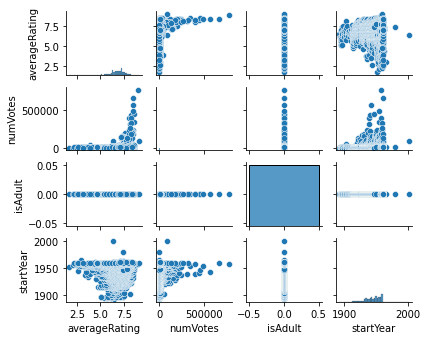

In [ ]:
# visualizing some relationships

sns.pairplot(new_complete_ratings, height=1.2, aspect=1.25)
plt.savefig('pariplot.png');

In [ ]:
# checking for the missing values in the dataset

new_complete_ratings.isna().any()

averageRating     False
numVotes          False
primaryTitle      False
originalTitle     False
isAdult           False
startYear         False
runtimeMinutes    False
genres            False
dtype: bool

In [ ]:
#Removing the duplicate values in the datset

new_complete_ratings.drop_duplicates(inplace=True)
new_complete_ratings.shape


(3970, 8)

## 2. Features



In [80]:
new_complete_ratings.head()

,averageRating,numVotes,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
tconst,,,,,,,,
tt0000001,5.7,1892.0,Carmencita,Carmencita,0.0,1894.0,1,"Documentary,Short"
tt0000003,6.5,1686.0,Pauvre Pierrot,Pauvre Pierrot,0.0,1892.0,4,"Animation,Comedy,Romance"
tt0000005,6.2,2501.0,Blacksmith Scene,Blacksmith Scene,0.0,1893.0,1,"Comedy,Short"
tt0000008,5.4,2029.0,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0.0,1894.0,1,"Documentary,Short"
tt0000010,6.9,6835.0,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0.0,1895.0,1,"Documentary,Short"


In [ ]:
# explode string into rows 

#df = new_complete_ratings.explode('genres').drop_duplicates()
#df.head()

,averageRating,numVotes,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
tconst,,,,,,,,
tt0000001,5.7,1892.0,Carmencita,Carmencita,0.0,1894.0,1,Documentary
tt0000001,5.7,1892.0,Carmencita,Carmencita,0.0,1894.0,1,Short
tt0000003,6.5,1686.0,Pauvre Pierrot,Pauvre Pierrot,0.0,1892.0,4,Animation
tt0000003,6.5,1686.0,Pauvre Pierrot,Pauvre Pierrot,0.0,1892.0,4,Comedy
tt0000003,6.5,1686.0,Pauvre Pierrot,Pauvre Pierrot,0.0,1892.0,4,Romance


In [ ]:
# print list of all unique genres

#print(df['genres'].unique())

['Documentary' 'Short' 'Animation' 'Comedy' 'Romance' 'Horror' 'Biography'
 'Fantasy' 'Drama' 'Family' 'Action' 'Adventure' 'Crime' 'Music' 'Sci-Fi'
 'Thriller' 'Mystery' 'History' 'War' 'Sport' 'Western' 'Musical'
 'Film-Noir']


In [82]:
X, Y = new_complete_ratings[['genres']], new_complete_ratings['averageRating']
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,"genres_Action,Adventure,Animation","genres_Action,Adventure,Biography","genres_Action,Adventure,Comedy","genres_Action,Adventure,Crime","genres_Action,Adventure,Drama","genres_Action,Adventure,Family","genres_Action,Adventure,Fantasy","genres_Action,Adventure,Film-Noir","genres_Action,Adventure,History","genres_Action,Adventure,Horror",...,genres_Sci-Fi,"genres_Sci-Fi,Thriller",genres_Short,"genres_Short,War",genres_Thriller,"genres_Thriller,War","genres_Thriller,War,Western",genres_War,"genres_War,Western",genres_Western
tconst,,,,,,,,,,,,,,,,,,,,,
tt0000001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tt0000003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tt0000005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tt0000008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tt0000010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
#train linear regression model, print the intercept of the slope

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 40)

regr = linear_model.LinearRegression() 
regr.fit(X_train, Y_train)
predicted = regr.predict(X_test)

intercept = regr.intercept_
print(intercept)

6.534769980997919


In [84]:
coeff_parameter = pd.DataFrame(regr.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
"genres_Action,Adventure,Animation",8.159787e-01
"genres_Action,Adventure,Biography",6.750931e-01
"genres_Action,Adventure,Comedy",3.920951e-01
"genres_Action,Adventure,Crime",6.676139e-01
"genres_Action,Adventure,Drama",1.899230e-01
...,...
"genres_Thriller,War",9.472656e-02
"genres_Thriller,War,Western",5.551115e-17
genres_War,2.209473e-02
"genres_War,Western",0.000000e+00


In [85]:
predictions = regr.predict(X_test)
predictions

array([ 6.93308541e+00,  6.97764107e+00,  7.40671822e+00,  6.93125436e+00,
        6.41770455e+00,  7.40671822e+00,  7.40671822e+00,  6.90330025e+00,
        6.58164498e+00,  7.18271920e+00,  7.11460397e+00,  4.95420357e+00,
        6.71348092e+00,  7.16562936e+00,  7.36631295e+00,  6.65513131e+00,
        6.99570748e+00,  6.81211373e+00,  6.90195748e+00,  7.07627389e+00,
        6.58164498e+00,  6.63828561e+00,  7.18271920e+00,  7.16562936e+00,
        6.69651315e+00,  7.20986305e+00,  6.96641061e+00,  6.80367451e+00,
        6.93516061e+00,  6.63560006e+00,  6.53476998e+00,  7.16855904e+00,
        7.16562936e+00,  7.05625436e+00,  6.58164498e+00,  6.63828561e+00,
        6.87815377e+00,  7.17295357e+00,  7.20322701e+00,  6.97996041e+00,
       -1.42662469e+13,  6.90330025e+00,  7.29648873e+00,  6.93308541e+00,
        7.03428170e+00,  7.03428170e+00,  7.16562936e+00,  7.16562936e+00,
        7.00547311e+00,  7.11460397e+00,  7.16562936e+00,  7.32505318e+00,
        6.93125436e+00,  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


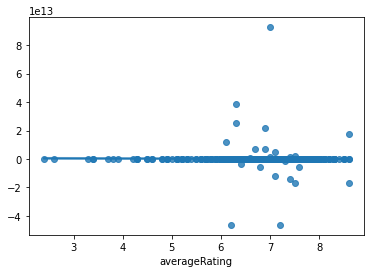

In [86]:
sns.regplot(Y_test,predictions)

In [87]:
import statsmodels.api as sm

X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)

ls=sm.OLS(Y_train,X_train_Sm).fit()
print(ls.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     4.508
Date:                Thu, 14 Jul 2022   Prob (F-statistic):          8.92e-124
Time:                        11:54:29   Log-Likelihood:                -3126.5
No. Observations:                3176   AIC:                             7051.
Df Residuals:                    2777   BIC:                             9470.
Df Model:                         398                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------